In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load data
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 2. Normalisasi (opsional, biar hasil lebih baik)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [3]:
# 3. Parameter
k = 5
max_iters = 100
np.random.seed(42)

In [4]:
# 4. Inisialisasi centroid secara acak dari data
centroids = X[np.random.choice(len(X), k, replace=False)]

# Fungsi menghitung Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [5]:
# 5. Iterasi K-Means
for _ in range(max_iters):
    # a. Assign data ke centroid terdekat
    clusters = []
    for point in X:
        distances = euclidean_distance(point, centroids)
        cluster_idx = np.argmin(distances)
        clusters.append(cluster_idx)
    clusters = np.array(clusters)
    
    # b. Update centroid berdasarkan rata-rata titik dalam cluster
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # Jika cluster kosong, tetap gunakan centroid lama
            new_centroids.append(centroids[i])
    new_centroids = np.array(new_centroids)

    # c. Cek konvergensi (jika centroid tidak berubah)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

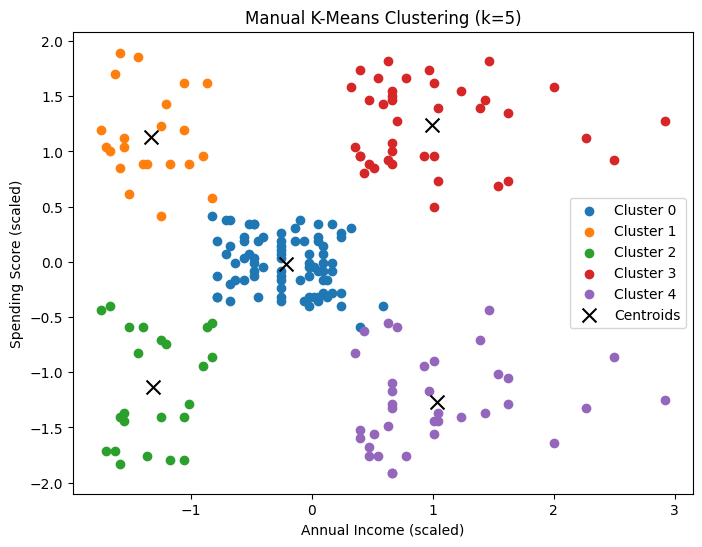

In [6]:
# 6. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title(f'Manual K-Means Clustering (k={k})')
plt.legend()
plt.show()